# ICS5111 - Mining and Visualising Large Scale Data

##  Yelp Data Set Challenge - 2017

User feedback and recommendation is potentially the most common and important ingredient to business success. For many 
businesses, the aim to ensure that the respective enterprise is thriving and doing, well boils down to many criteria, the 
most prevalent consisting of adopting a client first approach mentality to ensure good quality of service towards the customer. 
It is therefore no surprise that the longevity of a business is promoted by the number of customers retained, and the attraction
of new clients. It is therefore, the mission of the respective business enterprise to ensure the satisfaction of their 
clientele. A content client base promotes successful recommendation through different channels (word of mouth, social media, 
business review platforms), ensuring a solid reputation to the business, which in turn serves to retain the current customer 
base, or rope in new clients altogether. With the advance of telecommunication, social media and online business rating 
platforms, businesses have observed the need to achieve good rankings on such technological platforms to promote business 
success. With thousands of users discussing, reviewing their experiences, rating their satisfaction levels online, and making 
decisions based on other user reviews and recommendations, it is of no surprise that maintaining an active and positive 
influence on these online business rating platforms is detrimental to business longevity.

We believe that user reviews and comments are an extension of the user itself, and are key to understand the motives and thought
process of the client. Therefore, it is the aim of this case study to attempt to extract useful information regarding any user 
comments left on the Yelp recommendation system. Such information is useful when examined from varied angles, that is the examination and evaluation of user comments when examined independently or otherwise together as a bulk. More of this will be covered further on.

## Introducing the dataset

We first detail and attribute the Yelp dataset, to establish a common understanding of it's inner structure. To facilitate access to the underlying data, we adopted the usage of a MySQL database, with which we extract our data and feed into respective python processes for further data processing. Therefore throughout this case study, it will be common to see SQL queries responsible for extracting the data, followed by potential pythonic scripts which carry out further work on the extracted data.

The Yelp dataset is composed of the following tables, in which we devote special attention to the highlited ones:
 - attribute
 - **business**
 - **category**
 - checkin
 - elite_years
 - friend
 - **hours**
 - **photo**
 - **review**
 - **tip**
 - **user**
 
NB: Further tables rtelevant to the case study were created during the experiment, as denoted below.

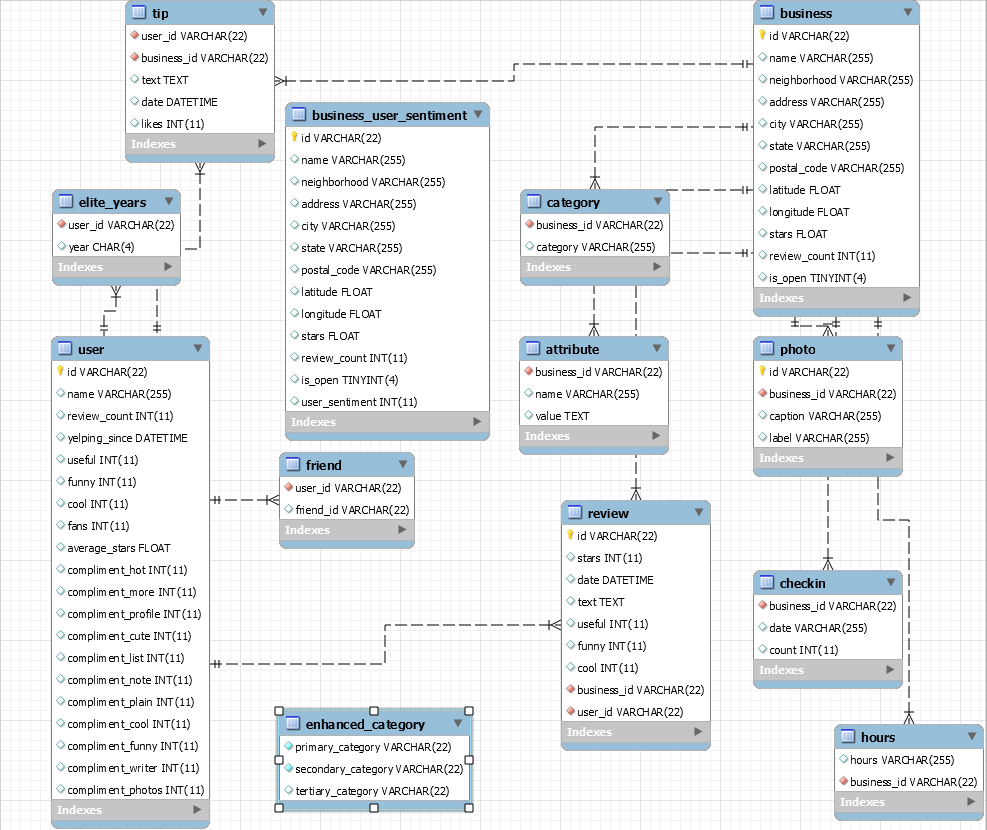

In [9]:
from IPython.display import Image
Image(filename="dependables/Yelp_Schema_Description/Schema EER Diagram.png")

### Dataset Formal Notation - Business Table

 - id: Yelp denoted business ID, used as table primary key.
 - name: Business attributed name.
 - neighborhood: Business registered neighborhood area.
 - address: Business registered address.
 - city: Business registered city.
 - state: Business registered state.
 - postal_code: Business registered postal code.
 - latitude: Business latitude coordinate.
 - longitude: Business longitude coordinate.
 - stars: Business attributed star rating.
 - review_count: Total sum of attrbited user reviews tied to the business.
 - is_open: 1 for business open, 0 for business closed.

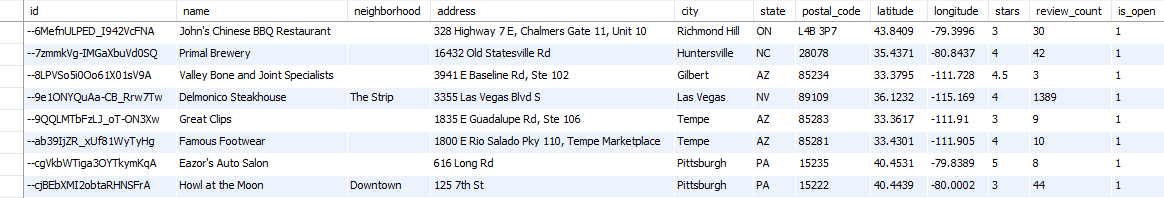

In [10]:
Image(filename="dependables/Yelp_Table_Description/business_table.png")

### Dataset Formal Notation - Category Table

 - business_id: Yelp denoted business_id, used to relate to business table. Used as table primary key
 - category: Descriptive string of category type.

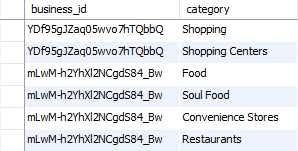

In [11]:
from IPython.display import Image
Image(filename="dependables/Yelp_Table_Description/category_table.png")

### Dataset Formal Notation - Hours Table

 - hours: Time open on a particular day.
 - business_id: Business id used to link to business table. Used as table primary key.

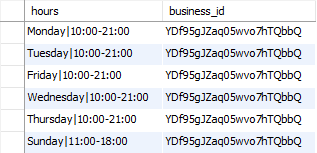

In [12]:
from IPython.display import Image
Image(filename="dependables/Yelp_Table_Description/hours_table.png")

### Dataset Formal Notation - Photo Table 

 - id: Yelp denoted photo id, used as table primary key.
 - business_id: Business id, used to link to business table.
 - caption: Related text caption to user captured photo.
 - label: Attributed photo tag.

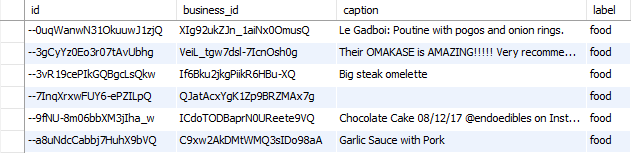

In [13]:
from IPython.display import Image
Image(filename="dependables/Yelp_Table_Description/photo_table.png")

### Dataset Formal Notation - Review Table

 - id: Yelp denoted review id, used as table primary key.
 - stars: Attributed star rating to user comment.
 - date: Date of review submission.
 - text: User text comment. Can be multi lingual.
 - useful: User ranking, whether comment was found useful.
 - funny: User ranking, whether comment was found funny.
 - cool: User ranking, whether comment was found cool.
 - business_id: Business id, used to link to business table.
 - user_id: User id, used to link to user table.

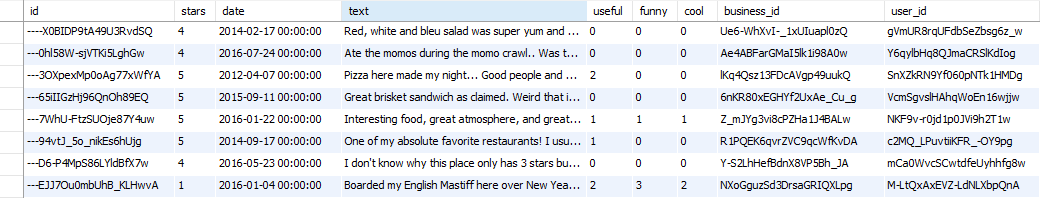

In [14]:
from IPython.display import Image
Image(filename="dependables/Yelp_Table_Description/review_table.png")

### Dataset Formal Notation - Tip Table

 - user_id: User id, used to link to user table.
 - business_id: Business id, used to link to business table.
 - text: User text comment. Can be multi lingual.
 - date: Date of tip submission.
 - likes: Number of attributed likes where likes >= 0

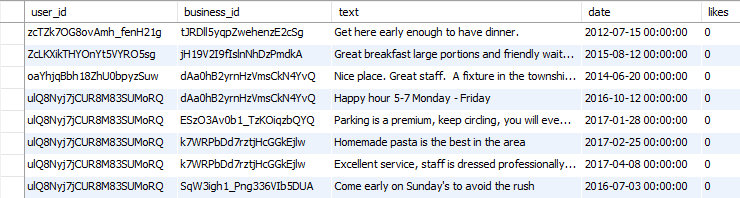

In [15]:
from IPython.display import Image
Image(filename="dependables/Yelp_Table_Description/tip_table.png")

### Dataset Formal Notation - User Table

 - id: Yelp denoted user id, used as table primary key.
 - name: User registered named.
 - review_count: Total number of reviews submitted by user.
 - yelping_since: Sign up date.
 - useful: Number of comments marked as 'useful'.
 - funny: Number of comments marked as 'funny'.
 - cool: Number of comments marked as 'cool'.
 - fans: Number of 'fans' (friends) linked with user.
 - average_stars: Average total reviews' star rating.
 - compliment_hot: Number of 'compliment_hot' compliments.
 - compliment_more: Number of 'compliment_more' compliments.
 - compliment_profile: Number of 'compliment_profile' compliments.
 - compliment_cute: Number of 'compliment_cute' compliments.
 - compliment_list: Number of 'compliment_list' compliments.
 - compliment_note: Number of 'compliment_note' compliments.
 - compliment_plain: Number of 'compliment_plain' compliments.
 - compliment_cool: Number of 'compliment_cool' compliments.
 - compliment_funny: Number of 'compliment_funny' compliments.
 - compliment_writer: Number of 'compliment_writer' compliments.
 - compliment_photos: Number of 'compliment_photos' compliments.

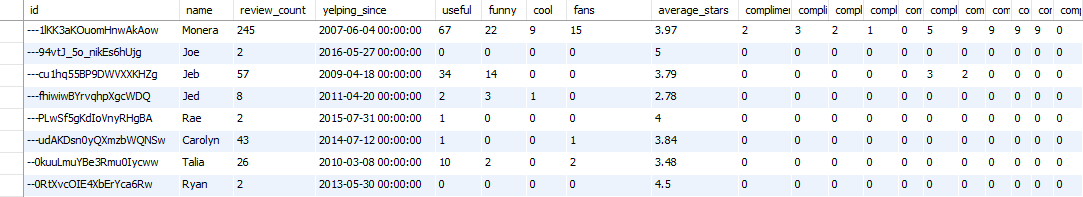

In [16]:
from IPython.display import Image
Image(filename="dependables/Yelp_Table_Description/user_table.png")

## Dataset Visualization and Statistical Analysis

## Individual Comment Analysis

This type of analysis includes the evaluation of individual user comments, which are tied with respective businesses. A user comment can range as one of the following:

 - **User Review** A user message attributed to a particular business regarding past experiences.
 - **User Tip** A user message attributed to a particular business, usually in the form of a short sentenced suggestion.
 - **User Photo Caption** A user message attributed to a photo, taken with respect to a particular business.
 
Such reviews allow us to gain insight on different fronts, including but not limited to the quality of service at a particular business, as well as the overall sentimentality of a particular user. More of this will be explained below.

## Bulk Comment Analysis